# Задача

20. Условная оптимизация. Метод штрафных функций
Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации
f(x)→min 
при ограничениях
g1(x)=0,…,gm(x)=0,h1(x)≤0,…,hp(x)≤0 
решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:
(F(x)+c∑i=1mg(hi)2+c∑k=1p[h(hk)]2+)→min, 
где  c  – некоторая возрастающая последовательность (например, геометрическая прогрессия),  [α]+=max{0,α} .

Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка
f(x1,x2,…,xn)=∑i=1n−1((1−xi)2+100(xi+1−x2i)2) 
с линейными и квадратичными ограничениями. Для  n=2  изобразите найденные точки минимума на каждой итерации.



# Решение задачи

In [ ]:
from scipy.optimize import minimize, rosen
import matplotlib.pyplot as plt
import  numpy as np
from matplotlib import cm, pylab

самостоятельно определим функцию

In [ ]:
rz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

Для решения задач условной оптимизации в пакете scipy.optimize предоставляется функцией minimize(). Даная функция уже имеет некоторые методы условной оптимизации, однако известно, что универсального способа для решения всех задач не существует. Для реализации метода штрафных функций необходимо определить следующее условия:

> x1−2x2+2=0 

> −x1−2x2+6=0(2)

> −x1−2x2+2=0

Ограничение:

In [ ]:
h_1 = lambda x: (x[0] - 2 * x[1] + 2)
h_2 = lambda x: (-x[0] - 2 * x[1] + 6)
h_3 = lambda x: (-x[0] + 2 * x[1] + 2)

Способ первый:

Основная идея метода штрафных функций состоит в преобразовании задачи минимизации функции с ограничениями. Ограничение ввели ранние. Для реализации необходима следующая функця:

In [ ]:
curr_func = lambda x: rz(x) + r * (1.0 / (h_1(x) ** 2 + h_2(x) ** 2 + h_3(x) ** 2))

Она включает в себя функцию Розенброка и ограничения.
Метод реализуем с помощью цикла с количеством итераций 1000. Для выхода с  цикла необходимо задать точность eps. Когда алгоритм достигнет необходимой точности, программа выйдет из цикла и выведет результат. 
Для расчета глобального минимума также обратимся к функции Scipy.optimize.minimize. 

In [ ]:
x_c = [2.3, 3]
i = 1
r = 1
b = 0.2
eps = 0.01
while i < 1000:

    x_c =minimize(curr_func, x_c).x
    i += 1
    r *= b
    if curr_func(x_c) < eps:
        break
print('Глобальный минимум (1-ого спсоба)  = {} '.format(list(x_c)))
print("Количество итерация из точностю {} ровно {} ".format(eps,i))

Глобальный минимум (1-ого спсоба)  = [0.9949500323360744, 0.9899139765416439] 
Количество итерация из точностю 0.01 ровно 3 


Text(0.5, 0.92, 'График метода 1')

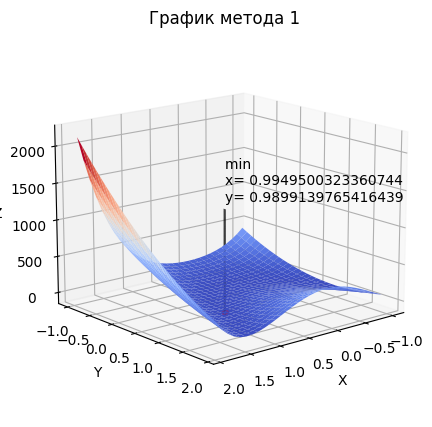

In [ ]:
fig = plt.figure(figsize=[6, 5])
# Создаем данные для графика
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = curr_func(np.array([X,Y]))
fun_plot_1 = fig.add_subplot(111, projection='3d')
fun_plot_1.scatter(list(x_c)[0],list(x_c)[1],20,color='red',marker='o')
fun_plot_1.text(list(x_c)[0],list(x_c)[1],1500,"min \nx= {}\ny= {}".format(list(x_c)[0],list(x_c)[1]), size=10, zorder=1, color='k')
fun_plot_1.quiver(1,1,np.linspace(1400,0,500),1,1,0,length=0.005, normalize=False,color='black')
surf_1 = fun_plot_1.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
fun_plot_1.set_xlabel('X')
fun_plot_1.set_ylabel('Y')
fun_plot_1.set_zlabel('Z')
fun_plot_1.view_init(15, 50)
plt.title('График метода 1')

Способ второй:

Метод Розенброка реализовано с помощью введённой ранее функции . Для поиска глобального минимума воспользуемся функцией minimize()с аргументами: rz – функция 1; x_0 – массив вещественных элементов размера.

Глобальный минимум способа 1  = [0.9997161292413886, 0.9994207292514449] 


Text(0.5, 0.92, 'График метода 2')

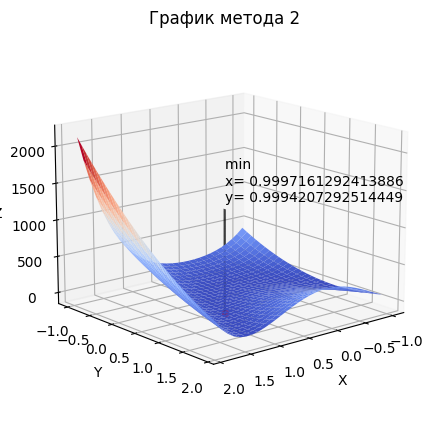

In [ ]:
x0 = [2.3, 5]
cons = ({'type': 'ineq', 'fun': h_1},
        {'type': 'ineq', 'fun': h_2},
        {'type': 'ineq', 'fun': h_3})
x_1 = minimize(rz, x0, constraints=cons).x
print('Глобальный минимум способа 1  = {} '.format(list(x_1)))
fig = plt.figure(figsize=[6, 5])
# Создаем данные для графика
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = rz(np.array([X,Y]))
fun_plot_1 = fig.add_subplot(111, projection='3d')
fun_plot_1.scatter(list(x_1)[0],list(x_1)[1],20,color='red',marker='o')
fun_plot_1.text(list(x_1)[0],list(x_1)[1],1500,"min \nx= {}\ny= {}".format(list(x_1)[0],list(x_1)[1]), size=10, zorder=1, color='k')
fun_plot_1.quiver(1,1,np.linspace(1400,0,500),1,1,0,length=0.005, normalize=False,color='black')
surf_1 = fun_plot_1.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
fun_plot_1.set_xlabel('X')
fun_plot_1.set_ylabel('Y')
fun_plot_1.set_zlabel('Z')
fun_plot_1.view_init(15, 50)
plt.title('График метода 2')

*Выводы:* 
1.	Реализована программа выполняет преобразования задачи минимизации функции методом штрафных функций и методом Розенброка. 
2.	Программа строит 3D графики результатов обоих методов. 
3.	Сравнивая одержанные  результаты видно, что они очень схожи. Визуально на графиках разницу заметить тяжело, потому что значение функций отличаются на сотые. Сравнение полученных точек глобального минимума показало следующее, что встроенной метод Розенброка   более точен чем метод штрафных функций. Но разница не слишком велика.  
